In [1]:
%reset -f
import os
import numpy as np
import torch
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor, Normalize, Compose

In [2]:
from scripts.mnistParity import MNISTParityVertical, MNISTParityHorizontal
from scripts.architecture import MLP
from scripts.train_utils import accuracy
from scripts.train import train_epoch, train_model, test_model
from scripts.plot_utils import plot_loss_accuracy

In [3]:
print(torch.__version__)

1.8.1+cu102


## Create Parity Data Iterator

### Vertical

In [4]:
transforms = Compose([
    ToTensor(),
    Normalize((0.1307,), (0.3081,))
])

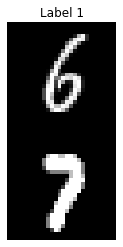

In [5]:
parityData2 = MNISTParityVertical(2, transforms = transforms)
parityData2.plotRandomData()

In [6]:
trainloaderParity2 = DataLoader(parityData2.trainset, batch_size=256, shuffle=True)
testloaderParity2 = DataLoader(parityData2.testset, batch_size=512, shuffle=True)

### Neural Network Part

In [7]:
inputShape0, inputShape1 = parityData2.trainset.data[0].shape
print(inputShape0 * inputShape1)

1568


In [8]:
learn_rate = 0.1 # for SGD
num_epochs = 20
loss_fn = torch.nn.CrossEntropyLoss()

In [9]:
model = MLP(inputShape0,inputShape1)
optimizer = torch.optim.SGD(model.parameters(), lr=learn_rate)

trainLostList, trainAccList, valLossList, valAccList  = train_model(model, trainloaderParity2, testloaderParity2, loss_fn, 
                                                                    optimizer, num_epochs, validate_model = True,
                                                                    performance=accuracy)


Training on cuda:0
Epoch 1 completed. Loss - total: 20511.2442 - average: 0.6837; Performance: 0.5654
TESTING - loss 3329.441279411316 - performance 0.6590
Epoch 2 completed. Loss - total: 18787.1896 - average: 0.6262; Performance: 0.6977
TESTING - loss 3122.193350315094 - performance 0.6548
Epoch 3 completed. Loss - total: 16856.2076 - average: 0.5619; Performance: 0.7558
TESTING - loss 2840.746922969818 - performance 0.7358
Epoch 4 completed. Loss - total: 15968.9362 - average: 0.5323; Performance: 0.7828
TESTING - loss 2865.0575275421143 - performance 0.7222
Epoch 5 completed. Loss - total: 15527.0215 - average: 0.5176; Performance: 0.7961
TESTING - loss 2728.597984313965 - performance 0.7520
Epoch 6 completed. Loss - total: 15222.3948 - average: 0.5074; Performance: 0.8047
TESTING - loss 2707.313422679901 - performance 0.7574
Epoch 7 completed. Loss - total: 14998.0070 - average: 0.4999; Performance: 0.8131
TESTING - loss 2696.4320373535156 - performance 0.7584
Epoch 8 completed. L

In [10]:
test_model(model, testloaderParity2, loss_fn = loss_fn)

TESTING - loss 2523.812090396881 - performance 0.8000


(2523.812090396881, 0.8)

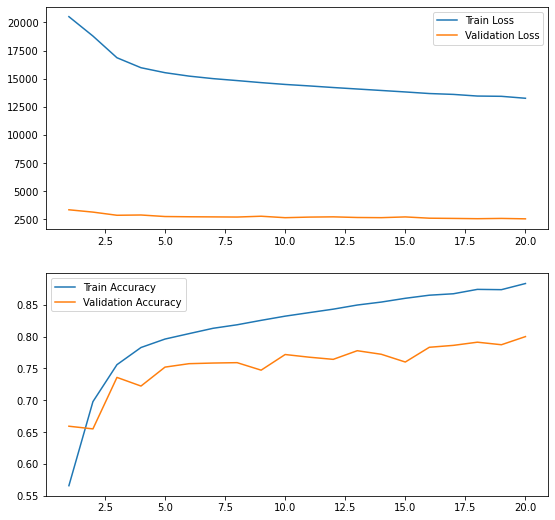

In [11]:
plot_loss_accuracy(trainLostList,valLossList,trainAccList,valAccList,num_epochs)

### For k = 3

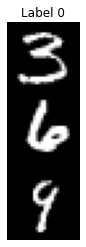

In [12]:
parityData3 = MNISTParityVertical(3, transforms = transforms)

parityData3.plotRandomData()

trainloaderParity3 = DataLoader(parityData3.trainset, batch_size=256, shuffle=True)
testloaderParity3 = DataLoader(parityData3.testset, batch_size=512, shuffle=True)

In [13]:
inputShape0, inputShape1 = parityData3.trainset.data[0].shape
print(inputShape0 * inputShape1)
model2 = MLP(inputShape0, inputShape1)
optimizer = torch.optim.SGD(model2.parameters(), lr=learn_rate)

trainLostList, trainAccList, valLossList, valAccList  = train_model(model2, trainloaderParity3, testloaderParity3, loss_fn, 
                                                                    optimizer, num_epochs, validate_model = True,
                                                                    performance=accuracy)

2352
Training on cuda:0
Epoch 1 completed. Loss - total: 13848.4708 - average: 0.6924; Performance: 0.5245
TESTING - loss 2333.8046659231186 - performance 0.4749
Epoch 2 completed. Loss - total: 13757.8460 - average: 0.6879; Performance: 0.5424
TESTING - loss 2347.0324637293816 - performance 0.5104
Epoch 3 completed. Loss - total: 13694.1949 - average: 0.6847; Performance: 0.5535
TESTING - loss 2356.7537398934364 - performance 0.4899
Epoch 4 completed. Loss - total: 13634.3602 - average: 0.6817; Performance: 0.5643
TESTING - loss 2386.587346792221 - performance 0.5047
Epoch 5 completed. Loss - total: 13558.3770 - average: 0.6779; Performance: 0.5741
TESTING - loss 2385.3019721508026 - performance 0.5128
Epoch 6 completed. Loss - total: 13492.0505 - average: 0.6746; Performance: 0.5858
TESTING - loss 2476.104023694992 - performance 0.5065
Epoch 7 completed. Loss - total: 13406.7423 - average: 0.6703; Performance: 0.6029
TESTING - loss 2422.6364811062813 - performance 0.4911
Epoch 8 comp

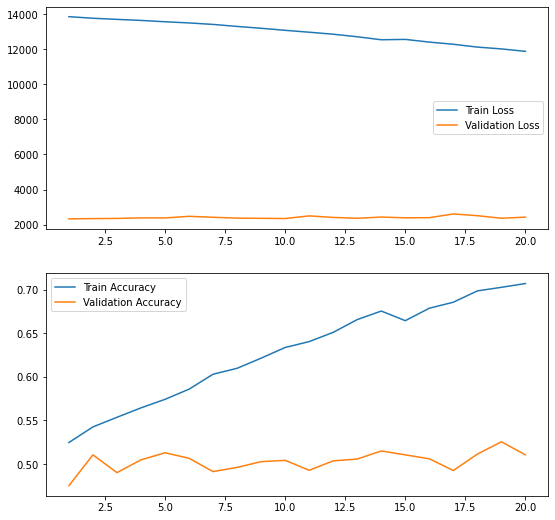

In [14]:
plot_loss_accuracy(trainLostList,valLossList,trainAccList,valAccList,num_epochs)

* For k=3, simple network can't learn but for k=2 it can, what is the main reason? (Check the paper one more time)
* Data is ready (hopefully), now we need to train with the proper models I think?

### Try with Horizontal Data

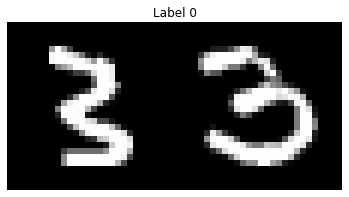

In [15]:
parityDataHor2 = MNISTParityHorizontal(2, transforms = transforms)
parityDataHor2.plotRandomData()

trainloaderParityHor2 = DataLoader(parityDataHor2.trainset, batch_size=256, shuffle=True)
testloaderParityHor2 = DataLoader(parityDataHor2.testset, batch_size=512, shuffle=True)

In [16]:
inputShape0, inputShape1 = parityDataHor2.trainset.data[0].shape
print(inputShape0 * inputShape1)

learn_rate = 0.1 # for SGD
num_epochs = 20
loss_fn = torch.nn.CrossEntropyLoss()


model3 = MLP(inputShape0,inputShape1)
optimizer = torch.optim.SGD(model3.parameters(), lr=learn_rate)

trainLostList, trainAccList, valLossList, valAccList  = train_model(model3, trainloaderParityHor2, testloaderParityHor2, loss_fn, 
                                                                    optimizer, num_epochs, validate_model = True,
                                                                    performance=accuracy)


1568
Training on cuda:0
Epoch 1 completed. Loss - total: 20538.3427 - average: 0.6846; Performance: 0.5580
TESTING - loss 3309.0636701583862 - performance 0.5766
Epoch 2 completed. Loss - total: 18803.6491 - average: 0.6268; Performance: 0.6984
TESTING - loss 3013.095941543579 - performance 0.7042
Epoch 3 completed. Loss - total: 16812.6910 - average: 0.5604; Performance: 0.7612
TESTING - loss 2840.3939123153687 - performance 0.7336
Epoch 4 completed. Loss - total: 15959.9901 - average: 0.5320; Performance: 0.7837
TESTING - loss 2766.8078207969666 - performance 0.7420
Epoch 5 completed. Loss - total: 15503.8873 - average: 0.5168; Performance: 0.7953
TESTING - loss 2782.17107963562 - performance 0.7392
Epoch 6 completed. Loss - total: 15227.3050 - average: 0.5076; Performance: 0.8049
TESTING - loss 2941.002519607544 - performance 0.7024
Epoch 7 completed. Loss - total: 15003.1350 - average: 0.5001; Performance: 0.8132
TESTING - loss 2706.1909551620483 - performance 0.7594
Epoch 8 comple

In [17]:
test_model(model3, testloaderParityHor2, loss_fn = loss_fn)

TESTING - loss 2541.6342697143555 - performance 0.7964


(2541.6342697143555, 0.7964)

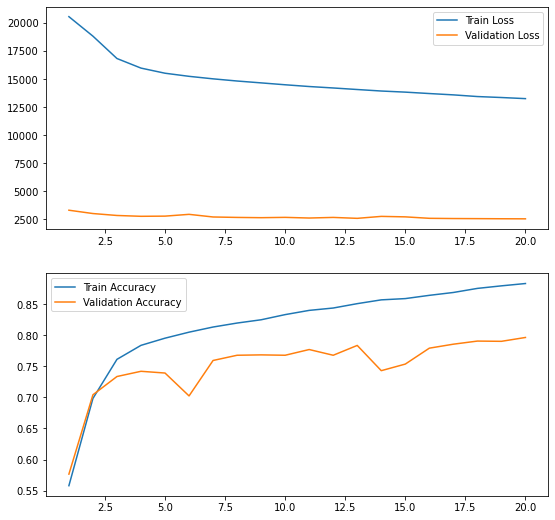

In [18]:
plot_loss_accuracy(trainLostList,valLossList,trainAccList,valAccList,num_epochs)

### For k = 3

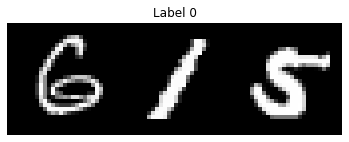

In [19]:
parityDataHor3 = MNISTParityHorizontal(3, transforms = transforms)
parityDataHor3.plotRandomData()

trainloaderParityHor3 = DataLoader(parityDataHor3.trainset, batch_size=256, shuffle=True)
testloaderParityHor3 = DataLoader(parityDataHor3.testset, batch_size=512, shuffle=True)

In [20]:
inputShape0, inputShape1 = parityDataHor3.trainset.data[0].shape
print(inputShape0 * inputShape1)

learn_rate = 0.1 # for SGD
num_epochs = 20
loss_fn = torch.nn.CrossEntropyLoss()


model4 = MLP(inputShape0,inputShape1)
optimizer = torch.optim.SGD(model4.parameters(), lr=learn_rate)

trainLostList, trainAccList, valLossList, valAccList  = train_model(model4, trainloaderParityHor3, testloaderParityHor3, loss_fn, 
                                                                    optimizer, num_epochs, validate_model = True,
                                                                    performance=accuracy)


2352
Training on cuda:0
Epoch 1 completed. Loss - total: 13842.7140 - average: 0.6921; Performance: 0.5238
TESTING - loss 2327.3331335783005 - performance 0.4968
Epoch 2 completed. Loss - total: 13761.2100 - average: 0.6881; Performance: 0.5448
TESTING - loss 2392.9295392632484 - performance 0.4959
Epoch 3 completed. Loss - total: 13703.5665 - average: 0.6852; Performance: 0.5522
TESTING - loss 2369.8388262987137 - performance 0.5092
Epoch 4 completed. Loss - total: 13623.6171 - average: 0.6812; Performance: 0.5689
TESTING - loss 2340.266645491123 - performance 0.4857
Epoch 5 completed. Loss - total: 13541.1713 - average: 0.6771; Performance: 0.5818
TESTING - loss 2389.8182846307755 - performance 0.4953
Epoch 6 completed. Loss - total: 13484.5307 - average: 0.6742; Performance: 0.5860
TESTING - loss 2356.4770268797874 - performance 0.4881
Epoch 7 completed. Loss - total: 13378.7643 - average: 0.6689; Performance: 0.6008
TESTING - loss 2356.4777957201004 - performance 0.4944
Epoch 8 com

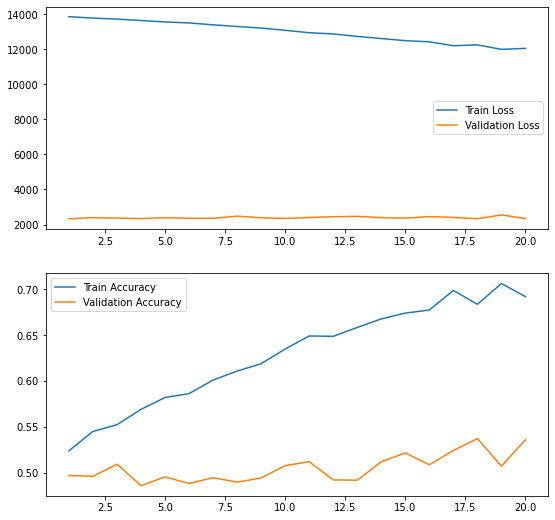

In [21]:
plot_loss_accuracy(trainLostList,valLossList,trainAccList,valAccList,num_epochs)

## TODO
* Debug the function (they are same but just in case) --> Debugged but they seem okay.
* Data part, check one more time                      --> Vertical one seems okay
* Also put reusable functions to scripts.py           --> Done
* Do it horizontally (Data) --> can be done with cat  --> Done